In [2]:
# Import the required Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [3]:
# Loading the Dataset

df = pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Removing Unwanted column

df.drop(['Item_Identifier'],axis=1,inplace=True)

## Basic EDA

In [ ]:
# Shape of the dataset

df.shape

(8523, 11)

In [ ]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
# Describe the Numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
# Describe the Categorical data

df.describe(include='O').T

,count,unique,top,freq
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [ ]:
# Identify the Missing Values

df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Checking for duplicate values

df.duplicated().sum()

0

In [ ]:
# Finding columns with numerical data

numericalColumns = df.select_dtypes(include=np.number).columns
numericalColumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Finding columns with objective data

objectColumns = df.select_dtypes(include=object).columns
objectColumns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Finding discrete columns and continuous columns from numerical columns

discreteCols=[]
continuousCols=[]

for column in numericalColumns:
    if df[column].nunique()>20:
        continuousCols.append(column)
    else:
        discreteCols.append(column)


In [ ]:
continuousCols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [ ]:
# Removing the Dependent Feature from ContinuousCols

continuousCols.remove('Item_Outlet_Sales')

In [ ]:
discreteCols

['Outlet_Establishment_Year']

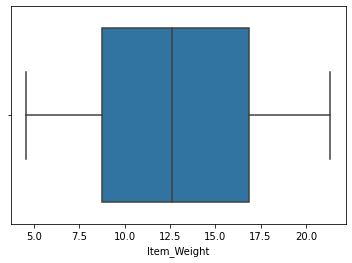

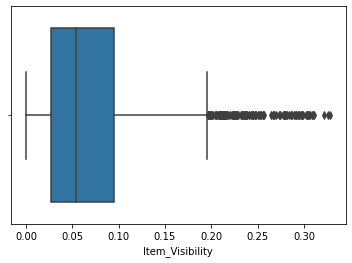

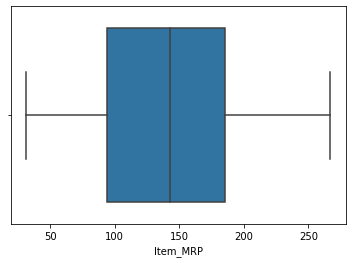

In [ ]:
# Checking for Outlier values by plotting

for column in continuousCols:
    sns.boxplot(column,data=df)
    plt.show()

## Missing Value Treatment

In [7]:
# Mean Imputation

df['Item_Weight'].fillna(df["Item_Weight"].mean(),inplace=True)

In [8]:
# Random Sample Imputation

random_sample=df['Outlet_Size'].dropna().sample(df['Outlet_Size'].isna().sum(),random_state=1)
random_sample.index=df[df['Outlet_Size'].isnull()].index
df.loc[df['Outlet_Size'].isna(),'Outlet_Size']=random_sample

In [9]:
# Mean imputation in the place of Zero values

print('Total Zero vales in Item_visibility:', df[df['Item_Visibility']==0].shape[0])
df['Item_Visibility'].loc[df['Item_Visibility']==0] = df['Item_Visibility'].mean()

Total Zero vales in Item_visibility: 526


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Outlier Treatment

In [10]:
# Handling Outlier from Item_Visibility

upper_lim=df['Item_Visibility'].mean() + df['Item_Visibility'].std() *3
lower_lim=df['Item_Visibility'].mean() - df['Item_Visibility'].std() *3

df.loc[(df['Item_Visibility'] > upper_lim),'Item_Visibility'] = upper_lim
df.loc[(df['Item_Visibility'] < lower_lim),'Item_Visibility'] = lower_lim


## Categorical Encoding

In [11]:
# Using Label Encoding

label_Item_Type = LabelEncoder()
df['Item_Type'] = label_Item_Type.fit_transform(df['Item_Type'])

In [12]:
# Using Mapping Technique

Item_Fat = {'Low Fat':1,'LF':1,'low fat':1,'Regular':2,'reg':2}
Outlet_Size = {'High':1,'Medium':2,'Small':3}
Outlet_Type = {'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3,'Grocery Store':4}

df['Item_Fat_Content'] = df['Item_Fat_Content'].map(Item_Fat)
df['Outlet_Size'] = df['Outlet_Size'].map(Outlet_Size)
df['Outlet_Type'] = df['Outlet_Type'].map(Outlet_Type)


In [13]:
# Using Split function in python

df["Outlet_Location_Type"] = df["Outlet_Location_Type"].str.split(" ").str[1]
df["Outlet_Location_Type"] = df["Outlet_Location_Type"].astype(int)
df["Outlet_Identifier"] = df["Outlet_Identifier"].str.split("0").str[1]
df["Outlet_Identifier"] = df["Outlet_Identifier"].astype(int)

## Correlation

In [14]:
# Correlation on Dataset based on Target Variable

df.corr()['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Identifier            0.185450
Outlet_Location_Type         0.089367
Item_Fat_Content             0.018719
Item_Type                    0.017048
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.099923
Item_Visibility             -0.127899
Outlet_Type                 -0.209854
Name: Item_Outlet_Sales, dtype: float64

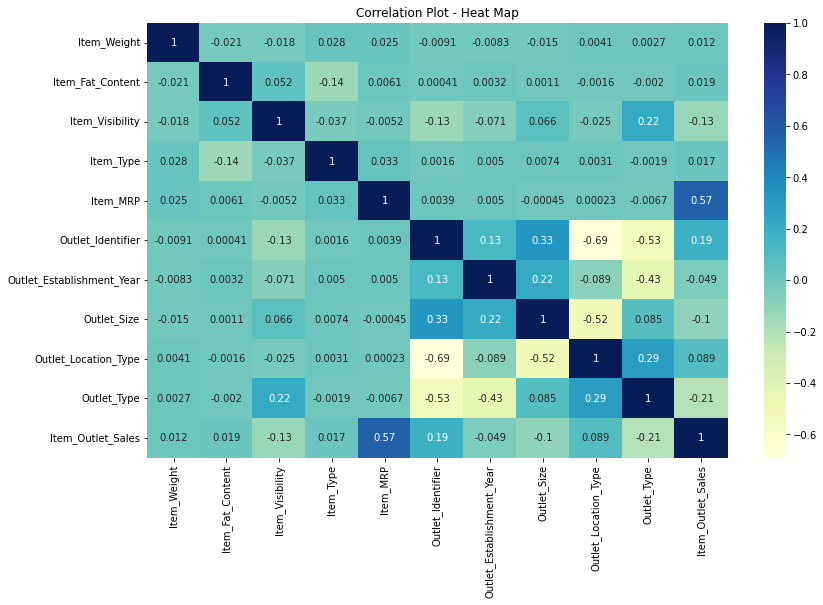

In [15]:
# Correlation Using Heat Map in Input Dataset

plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation Plot - Heat Map')
plt.show()

## Normalization & Standardization

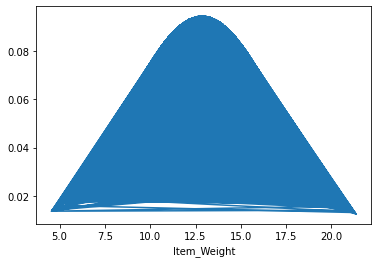

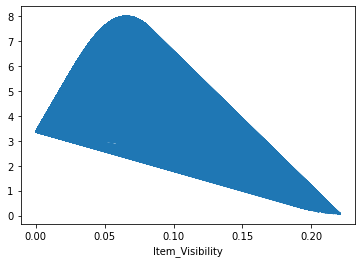

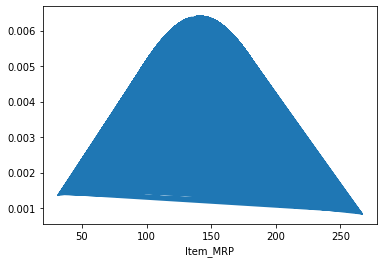

In [ ]:
# Plotting th Continous columns in Normal Distribution

for column in continuousCols:
    mean = np.mean(df[column])
    std = np.std(df[column])
    plt.plot(df[column], norm.pdf(df[column],mean,std))
    plt.xlabel(column)
    plt.show()

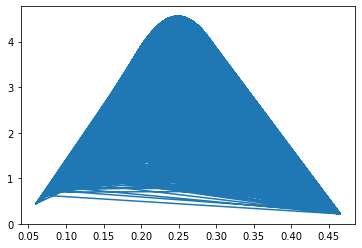

In [16]:
# Making 'Item_Visibilty' feature to Noramly Distributed data using Square root Transformtion

df['Item_Visibility'] = df['Item_Visibility']**(1/2)
mean = np.mean(df['Item_Visibility'])
std = np.std(df['Item_Visibility'])
plt.plot(df['Item_Visibility'], norm.pdf(df['Item_Visibility'],mean,std))
plt.show()

## Train Test Split

In [17]:
X = df.drop(['Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## Scale Down

In [18]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Apply All Regression Algorithms

In [19]:
# Voting Regressor

lr_re = LinearRegression()
dt_re = DecisionTreeRegressor()
rf_re = RandomForestRegressor()
ad_re = AdaBoostRegressor()
gd_re = GradientBoostingRegressor()
svr_re = SVR()
knn_re = KNeighborsRegressor()
xgb_re = XGBRegressor()

voting = VotingRegressor(estimators=[('Linear_Regression',lr_re),('Decision_Tree_Regressor',dt_re),('Random_Forest_Regressor',rf_re),('AdaBoost_Regressor',ad_re),
                            ('Gradient_Boosting_Regressor',gd_re),('SVR_Regressor',svr_re),('KNeighbors_Regressor',knn_re),('XGB_Regressor',xgb_re)])

voting.fit(X_train_scaled,y_train)

[16:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('Linear_Regression', LinearRegression()),
                            ('Decision_Tree_Regressor',
                             DecisionTreeRegressor()),
                            ('Random_Forest_Regressor',
                             RandomForestRegressor()),
                            ('AdaBoost_Regressor', AdaBoostRegressor()),
                            ('Gradient_Boosting_Regressor',
                             GradientBoostingRegressor()),
                            ('SVR_Regressor', SVR()),
                            ('KNeighbors_Regressor', KNeighborsRegressor()),
                            ('XGB_Regressor', XGBRegressor())])

In [20]:
print(voting.score(X_train_scaled,y_train))
print(voting.score(X_test_scaled,y_test))

0.7493034699795718
0.5867740532527376


In [21]:
# Applying all Regression Algorithms to find the best model

for reg in (lr_re,dt_re,rf_re,ad_re,gd_re,svr_re,knn_re,xgb_re):
  reg.fit(X_train_scaled,y_train)
  y_pred = reg.predict(X_test_scaled)
  print(reg.__class__.__name__,reg.score(X_train_scaled,y_train))
  print(reg.__class__.__name__,reg.score(X_test_scaled,y_test))

  print("============================================")

LinearRegression 0.47267990084085687
LinearRegression 0.4704201491667248
DecisionTreeRegressor 1.0
DecisionTreeRegressor 0.22447270891044724
RandomForestRegressor 0.9384643542460424
RandomForestRegressor 0.5679736240725846
AdaBoostRegressor 0.5168764135734711
AdaBoostRegressor 0.5004815622533574
GradientBoostingRegressor 0.6312064766850007
GradientBoostingRegressor 0.609799554582381
SVR 0.05755121090908344
SVR 0.08532577860461876
KNeighborsRegressor 0.6753341163216878
KNeighborsRegressor 0.5327709648935719
[16:31:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 0.6276376573559169
XGBRegressor 0.6102528825135637


## Hyperparameter Tuning

In [ ]:
ridge_re = Ridge()
lasso_re = Lasso()
dt_re = DecisionTreeRegressor()
rf_re = RandomForestRegressor()
ad_re = AdaBoostRegressor()
gd_re = GradientBoostingRegressor()
svr_re = SVR()
knn_re = KNeighborsRegressor()

reg_list = [ridge_re,lasso_re,dt_re,rf_re,ad_re,gd_re,svr_re,knn_re,xgb_re]

grid_params_rid= [{'alpha':[0.1,0.5,0.8,5,10,20,50],'solver':['svd','cholesky','lsqr','saga']}]

grid_params_las= [{'alpha':[0.1,0.5,0.8,5,10,20,50]}]

grid_params_df = [{'criterion':['squared_error','friedman_mse','absolute_error'], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf= [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['squared_error','friedman_mse','absolute_error'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost= [{'n_estimators':[10,50,100,250,1000],'learning_rate':[0.01,0.1,1]}]

grid_params_grad= [{'loss':['squared_error','absolute_error','huber','quantile'],'learning_rate':[0.1,1,7,9],'criterion':['friedman_mse','squared_error'],'max_features':['auto','sqrt','log2']}]

grid_params_svr= [{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]

grid_params_knn= [{'n_neighbors':[5,7,10,15,20,25,30],'weights':['uniform','distance']}]


reg_params = [grid_params_rid,grid_params_las,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svr,grid_params_knn]

In [ ]:
for reg,reg_param in zip(reg_list,reg_params):
  print(f"The Classifier is {reg} and its hyper params are {reg_param}")

  grid_reg = GridSearchCV(estimator=reg,param_grid=reg_param,cv=10)
  grid_reg.fit(X_train_scaled,y_train)
  
  print(f"The Train accuracy for the {reg} is {grid_reg.best_score_}")

  print(f"The Best param for the {reg} is {grid_reg.best_params_}")
  print("====================\n")

The Classifier is Ridge() and its hyper params are [{'alpha': [0.1, 0.5, 0.8, 5, 10, 20, 50], 'solver': ['svd', 'cholesky', 'lsqr', 'saga']}]
The Train accuracy for the Ridge() is 0.46988945648698277
The Best param for the Ridge() is {'alpha': 0.8, 'solver': 'lsqr'}

The Classifier is Lasso() and its hyper params are [{'alpha': [0.1, 0.5, 0.8, 5, 10, 20, 50]}]
The Train accuracy for the Lasso() is 0.4699100484891045
The Best param for the Lasso() is {'alpha': 0.8}

The Classifier is DecisionTreeRegressor() and its hyper params are [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeRegressor() is 0.5853724827157127
The Best param for the DecisionTreeRegressor() is {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}

The Classifier is RandomF

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:978: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


The Train accuracy for the GradientBoostingRegressor() is 0.5937026064963671
The Best param for the GradientBoostingRegressor() is {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_features': 'auto'}

The Classifier is SVR() and its hyper params are [{'kernel': ['linear', 'poly', 'rbf'], 'degree': [3, 4, 5]}]
The Train accuracy for the SVR() is 0.31408017935762134
The Best param for the SVR() is {'degree': 3, 'kernel': 'linear'}

The Classifier is KNeighborsRegressor() and its hyper params are [{'n_neighbors': [5, 7, 10, 15, 20, 25, 30], 'weights': ['uniform', 'distance']}]
The Train accuracy for the KNeighborsRegressor() is 0.5664048781723393
The Best param for the KNeighborsRegressor() is {'n_neighbors': 30, 'weights': 'uniform'}



In [ ]:
# Hyper Parameter Tuning for XGBRegressor

params = [{'learning_rate':[0.05,0.15,0.25],
'max_depth':[3,4,6],
'min_child_weight':[1,3,5,6],
'gamma':[0.0,0.1,0.2],
'colsample_bytree':[0.3,0.4,0.5,0.6]}]

xgb_re = XGBRegressor()

grid_re = GridSearchCV(xgb_re,params,cv=10)

In [ ]:
grid_re.fit(X_train_scaled,y_train)

[13:53:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=10, estimator=XGBRegressor(),
             param_grid=[{'colsample_bytree': [0.3, 0.4, 0.5, 0.6],
                          'gamma': [0.0, 0.1, 0.2],
                          'learning_rate': [0.05, 0.15, 0.25],
                          'max_depth': [3, 4, 6],
                          'min_child_weight': [1, 3, 5, 6]}])

In [ ]:
grid_re.best_score_

0.5932449289381622

In [ ]:
grid_re.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 1}

In [116]:
# Making the Best Model - Random Forest

rf_reg = RandomForestRegressor(criterion='squared_error',max_depth=5,max_features='auto',n_estimators=6)
Random_Forest_reg = rf_reg.fit(X_train_scaled,y_train)

In [117]:
print("Train Accuracy :",Random_Forest_reg.score(X_train_scaled,y_train))
print("Test Accuracy :",Random_Forest_reg.score(X_test_scaled,y_test))
y_pred = Random_Forest_reg.predict(X_test_scaled)
print("R2 Score :",r2_score(y_test,y_pred)) 
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))

Train Accuracy : 0.606052006755774
Test Accuracy : 0.6176836241922812
R2 Score : 0.6176836241922812
RMSE : 1019.3745461913248


In [44]:
# Pickle File

import joblib 
joblib.dump(rf_reg,'/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/model.pkl')

['/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/model.pkl']

In [143]:
df2 = pd.read_csv("/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/test.csv")

In [60]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [61]:
df2.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [144]:
df2['Item_Weight'].fillna(12.857645,inplace=True)

random_sample=df2['Outlet_Size'].dropna().sample(df2['Outlet_Size'].isna().sum(),random_state=1)
random_sample.index=df2[df2['Outlet_Size'].isnull()].index
df2.loc[df2['Outlet_Size'].isna(),'Outlet_Size']=random_sample


print('Total Zero vales in Item_visibility:', df2[df2['Item_Visibility']==0].shape[0])
df2['Item_Visibility'].loc[df2['Item_Visibility']==0] = 0.257161

Total Zero vales in Item_visibility: 353


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [69]:
rf_df2 = joblib.load('/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/model.pkl')

In [145]:
X=df2.drop('Item_Identifier',axis=1)

In [146]:
X['Item_Type'] = label_Item_Type.transform(X['Item_Type'])

In [147]:
Item_Fat = {'Low Fat':1,'LF':1,'low fat':1,'Regular':2,'reg':2}
Outlet_Size = {'High':1,'Medium':2,'Small':3}
Outlet_Type = {'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3,'Grocery Store':4}

X['Item_Fat_Content'] = X['Item_Fat_Content'].map(Item_Fat)
X['Outlet_Size'] = X['Outlet_Size'].map(Outlet_Size)
X['Outlet_Type'] = X['Outlet_Type'].map(Outlet_Type)

In [148]:
X["Outlet_Location_Type"] = X["Outlet_Location_Type"].str.split(" ").str[1]
X["Outlet_Location_Type"] = X["Outlet_Location_Type"].astype(int)
X["Outlet_Identifier"] = X["Outlet_Identifier"].str.split("0").str[1]
X["Outlet_Identifier"] = X["Outlet_Identifier"].astype(int)

In [149]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,49,1999,2,1,1
1,8.300000,2,0.038428,4,87.3198,17,2007,3,2,1
2,14.600000,1,0.099575,11,241.7538,1,1998,2,3,4
3,7.315000,1,0.015388,13,155.0340,17,2007,1,2,1
4,12.857645,2,0.118599,4,234.2300,27,1985,2,3,3


In [150]:
X = scaler.transform(X) 

In [151]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.177085e+00,0.0,-1.932473,1.166667,-0.392754,0.785714,0.000000,0.0,-0.5,0.0
1,-6.797383e-01,1.0,-1.687513,-0.333333,-0.614402,-0.357143,0.470588,1.0,0.0,0.0
2,2.598590e-01,0.0,-1.202185,0.833333,1.051905,-0.928571,-0.058824,0.0,0.5,3.0
3,-8.266436e-01,0.0,-1.870377,1.166667,0.116219,-0.357143,0.470588,-1.0,0.0,0.0
4,-2.746249e-08,1.0,-1.051187,-0.333333,0.970725,0.000000,-0.823529,0.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...
5676,-3.516249e-01,1.0,-1.885394,1.166667,-0.031802,0.678571,-0.117647,1.0,-0.5,0.0
5677,-7.841380e-01,1.0,-0.857590,1.500000,0.268471,-0.321429,0.588235,0.0,0.5,1.0
5678,-4.261961e-01,0.0,-1.408916,0.333333,-0.275342,0.642857,0.176471,1.0,0.0,0.0
5679,3.642587e-01,1.0,0.048583,-0.500000,0.759157,-0.357143,0.470588,0.0,0.0,0.0


In [152]:
Pred3 = rf_df2.predict(X)

In [154]:
df2['Item_Outlet_Sales'] = Pred3

In [153]:
Pred3

array([1560.60473886, 1490.68648099,  519.82928156, ..., 1903.19410836,
       3563.73351388, 1248.39032652])

In [155]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1560.604739
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1490.686481
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,519.829282
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,High,Tier 2,Supermarket Type1,2528.239156
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6367.553372


In [156]:
df2.drop(['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [157]:
df2.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1560.604739
1,FDW14,OUT017,1490.686481
2,NCN55,OUT010,519.829282
3,FDQ58,OUT017,2528.239156
4,FDY38,OUT027,6367.553372


In [158]:
df2.to_csv('/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/Random_Forest.csv')